<a href="https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/latent_diffusion_upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image super-resolution using Latent Diffusion

This colab notebook shows how to use the Latent Diffusion image super-resolution model using 🧨 [diffusers](https://github.com/huggingface/diffusers) libray.

The model was originally released in [Latent Diffusion repo](https://github.com/CompVis/latent-diffusion). It's a simple, 4x super-resolution model diffusion model. This model is not conditioned on text.

### Install the Deps

In [1]:
!pip install -qq git+https://github.com/huggingface/diffusers.git accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 175 kB 5.1 MB/s 
     |████████████████████████████████| 182 kB 46.5 MB/s 


### Imports

In [1]:
import torch
from PIL import Image
import requests
from io import BytesIO

from diffusers import LDMSuperResolutionPipeline

### Load the pipeline

In [2]:
device = "cuda"
pipe = LDMSuperResolutionPipeline.from_pretrained( "CompVis/ldm-super-resolution-4x-openimages")
pipe = pipe.to(device)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

### Get the image for demo

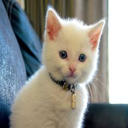

In [3]:
# let's download an  image
url = "https://i.pinimg.com/236x/af/84/56/af8456faa55d76bd9afa18cd2fd72d58.jpg"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
low_res_img

### Run pipeline to upscale the image

In [4]:
# run pipeline in inference (sample random noise and denoise)
upscaled_image = pipe(low_res_img, num_inference_steps=100, eta=1).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

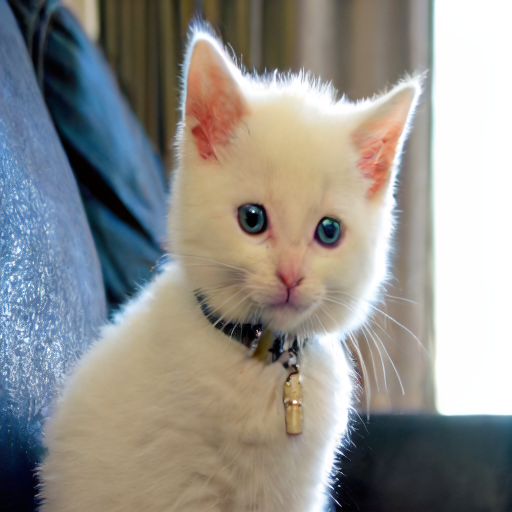

In [5]:
upscaled_image